In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('PHMSA Cleaned Data/Main_Mile_Construction_2010_2020.csv',index_col=0)

In [3]:
def get_state_main_miles(sa):
    miles10a = df[df.State==sa].reset_index(drop=True)
    milesmo = miles10a[miles10a['Operator Type']=='Municipal Owned'].reset_index(drop=True)
    milesio = miles10a[miles10a['Operator Type']=='Investor Owned'].reset_index(drop=True)
    milespo = miles10a[miles10a['Operator Type']=='Privately Owned'].reset_index(drop=True)
    milesco = miles10a[miles10a['Operator Type']=='Cooperative'].reset_index(drop=True)
    dfs = [milesmo,milesio,milespo,milesco,miles10a]
    dfnames = ['Municipal Owned','Investor Owned','Privately Owned','Cooperative','Total']
    finals = []
    for i in range(5):
        tot = ['','Total',dfnames[i],'']
        mt = [int(sum(dfs[i][str(year) + ' - Main Miles Built'])) for year in range(2010,2021)]
        data = tot+mt
        finals.append(data)
    for i in range(5):
        miles10a.loc[len(miles10a.index)] = finals[i]
    miles10a = miles10a.iloc[::-1].reset_index(drop=True)
    return miles10a

In [8]:
miles10a = get_state_main_miles('CA')

In [9]:
miles10a.head(5)

,Operator ID,Operator Name,Operator Type,State,2010 - Main Miles Built,2011 - Main Miles Built,2012 - Main Miles Built,2013 - Main Miles Built,2014 - Main Miles Built,2015 - Main Miles Built,2016 - Main Miles Built,2017 - Main Miles Built,2018 - Main Miles Built,2019 - Main Miles Built,2020 - Main Miles Built
0,,Total,Total,,245.0,314.0,318.0,427.0,585.0,534.0,640.0,893.0,937.0,824.0,385.0
1,,Total,Cooperative,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,,Total,Privately Owned,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
3,,Total,Investor Owned,,229.0,289.0,297.0,403.0,568.0,514.0,636.0,882.0,928.0,816.0,384.0
4,,Total,Municipal Owned,,16.0,24.0,21.0,23.0,15.0,19.0,2.0,10.0,7.0,6.0,1.0


In [10]:
miles = [miles10a.at[0,'2010 - Main Miles Built']]
for i in range(2011,2021):
    miles.append(miles[-1] + miles10a.at[0,str(i)+' - Main Miles Built'])

In [19]:
ca_tot = [miles10a.iloc[0,4+i]/107898 for i in range(len(miles))]

In [20]:
ca_tot

[0.002270663033605813,
 0.0029101558879682664,
 0.0029472279374965246,
 0.00395744128714156,
 0.005421787243507757,
 0.0049491186120224654,
 0.005931527924521307,
 0.008276335057183636,
 0.008684127601994477,
 0.007636842202821183,
 0.003568184767094849]

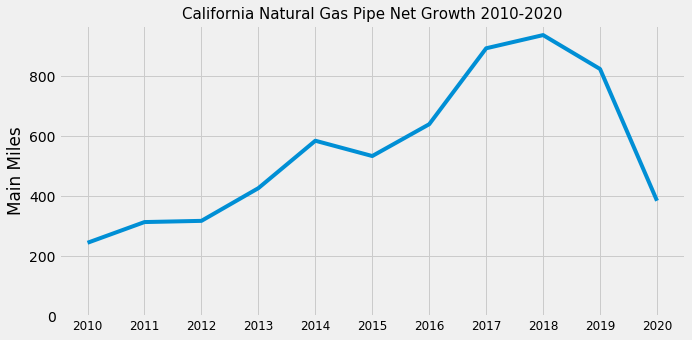

In [30]:
plt.figure(figsize = (10,5))
plt.style.use('fivethirtyeight')
plt.plot(list(range(2010,2021)), miles10a.iloc[0,4:])
plt.ylabel('Main Miles')
plt.xticks((np.arange(2010, 2021, step=1)), fontsize=12)
plt.ylim(0,)
plt.title('California Natural Gas Pipe Net Growth 2010-2020', fontsize=15)
plt.show()

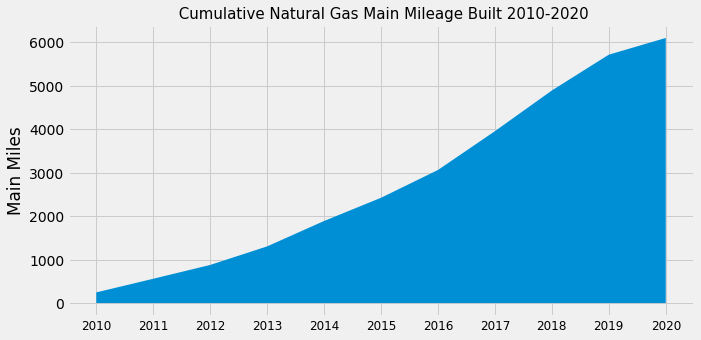

In [24]:
plt.figure(figsize = (10,5))
plt.style.use('fivethirtyeight')
plt.stackplot(list(range(2010,2021)), miles, labels=['Main Miles'])
plt.ylabel('Main Miles')
plt.xticks((np.arange(2010, 2021, step=1)), fontsize=12)
plt.title(' Cumulative Natural Gas Main Mileage Built 2010-2020', fontsize=15)
plt.show()

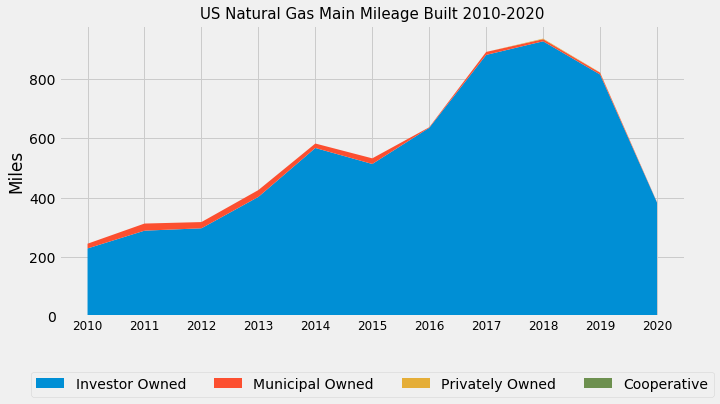

In [12]:
plt.figure(figsize = (10,5))
plt.style.use('fivethirtyeight')
co_sum = list(miles10a.iloc[1,4:])
po_sum = list(miles10a.iloc[2,4:])
io_sum = list(miles10a.iloc[3,4:])
mo_sum = list(miles10a.iloc[4,4:])
plt.stackplot(list(range(2010,2021)), io_sum, mo_sum, po_sum, co_sum, labels=['Investor Owned','Municipal Owned','Privately Owned','Cooperative'])
#plt.ylim(0,max_val*1.1)
plt.ylabel('Miles')
#plt.yticks(np.arange(0,max_val*1.1, step=5000), fontsize=12)
plt.xticks((np.arange(2010, 2021, step=1)), fontsize=12)
plt.title('US Natural Gas Main Mileage Built 2010-2020', fontsize=15)
plt.legend(loc='lower center',fontsize=14, ncol=4, bbox_to_anchor=(0.5, -0.3))
plt.show()